In [1]:
import numpy as np
import numpy
import pandas
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Using TensorFlow backend.


In [2]:
# ===========================================================================
#                              [Import dataset]
# ===========================================================================

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [3]:
bh= pd.DataFrame(boston.data)
bh.columns = boston.feature_names
bh['PRICE'] = boston.target
print(bh.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


# Data Exploration

In [4]:
nulls = bh.isnull().sum()
nulls = nulls.sum()

# no nulls, 31 cols, great
print('\nThere are', bh.shape[0],'rows in the dataset')
print('There are', bh.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')


There are 506 rows in the dataset
There are 14 columns (features) in the dataset
There are 0 nulls in the dataset


### Statistical Report

In [5]:
bh.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Univariate Plots

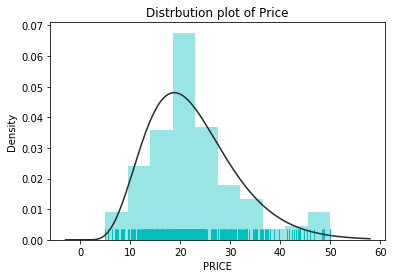

In [6]:
sns.distplot(bh['PRICE'], bins=10, kde=False, rug=True, fit=stats.gamma, color = 'c');
plt.ylabel('Density')
plt.title("Distrbution plot of Price")
plt.show()

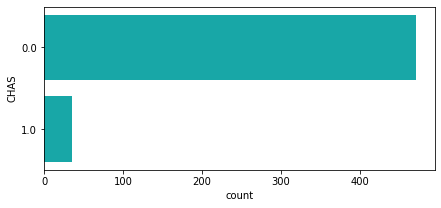

In [7]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="CHAS", data=bh, color="c");

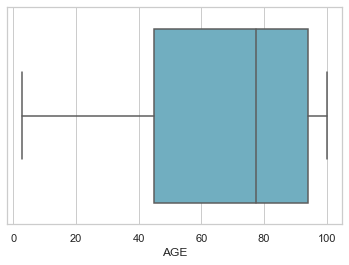

In [8]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=bh["AGE"], color = 'c')

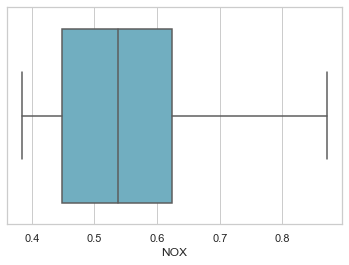

In [9]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=bh["NOX"], color = 'c')

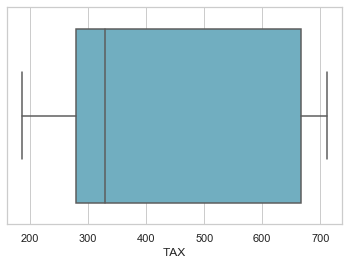

In [10]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=bh["TAX"], color = 'c')

### Multivariate

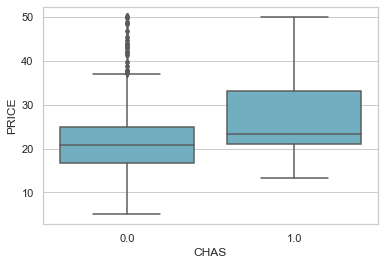

In [11]:
ax = sns.boxplot(x="CHAS", y="PRICE", data=bh, color = 'c')

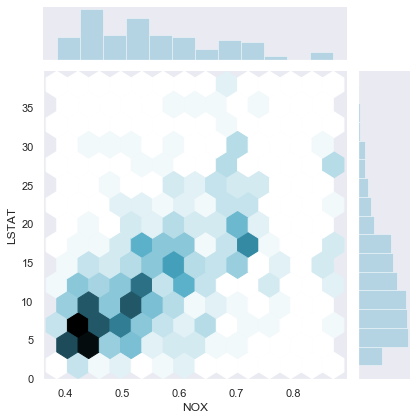

In [12]:
with sns.axes_style("dark"):
    sns.jointplot(x='NOX', y='LSTAT', kind="hex",data = bh, color="c");

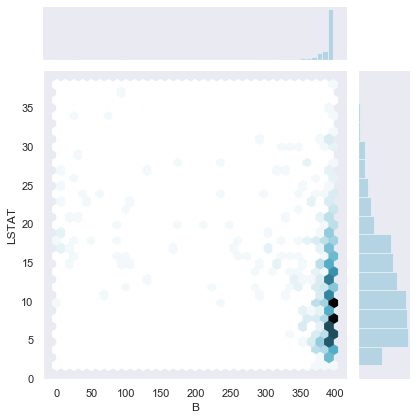

In [13]:
with sns.axes_style("dark"):
    sns.jointplot(x='B', y='LSTAT', kind="hex",data = bh, color="c");

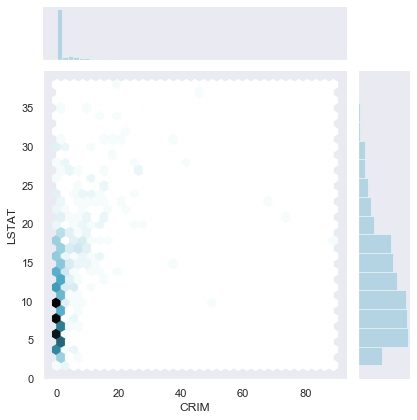

In [14]:
with sns.axes_style("dark"):
    sns.jointplot(x='CRIM', y='LSTAT', kind="hex",data = bh, color="c");

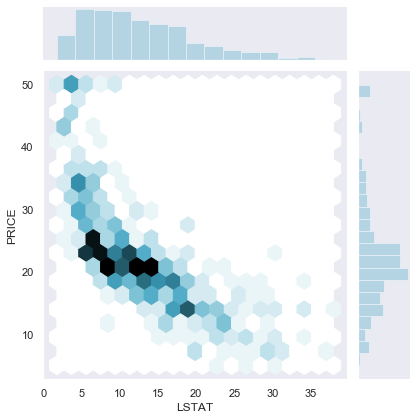

In [15]:
with sns.axes_style("dark"):
    sns.jointplot(x='LSTAT', y='PRICE', kind="hex",data = bh, color="c");

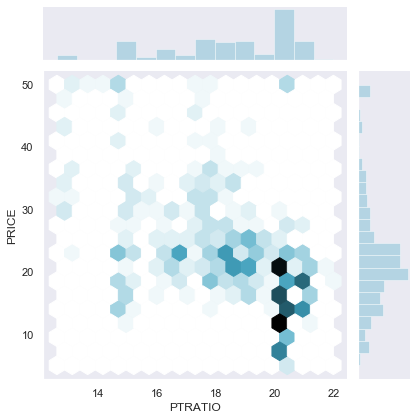

In [16]:
with sns.axes_style("dark"):
    sns.jointplot(x='PTRATIO', y='PRICE', kind="hex",data = bh, color="c");


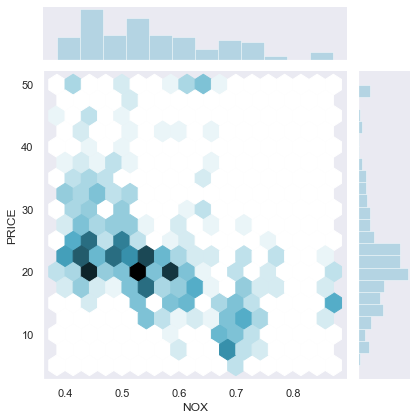

In [17]:
with sns.axes_style("dark"):
    sns.jointplot(x='NOX', y='PRICE', kind="hex",data = bh, color="c");

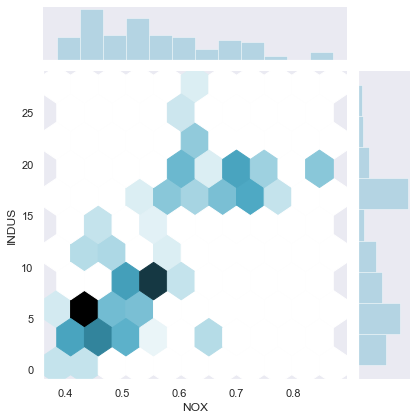

In [18]:
with sns.axes_style("dark"):
    sns.jointplot(x='NOX', y='INDUS', kind="hex",data = bh, color="c");

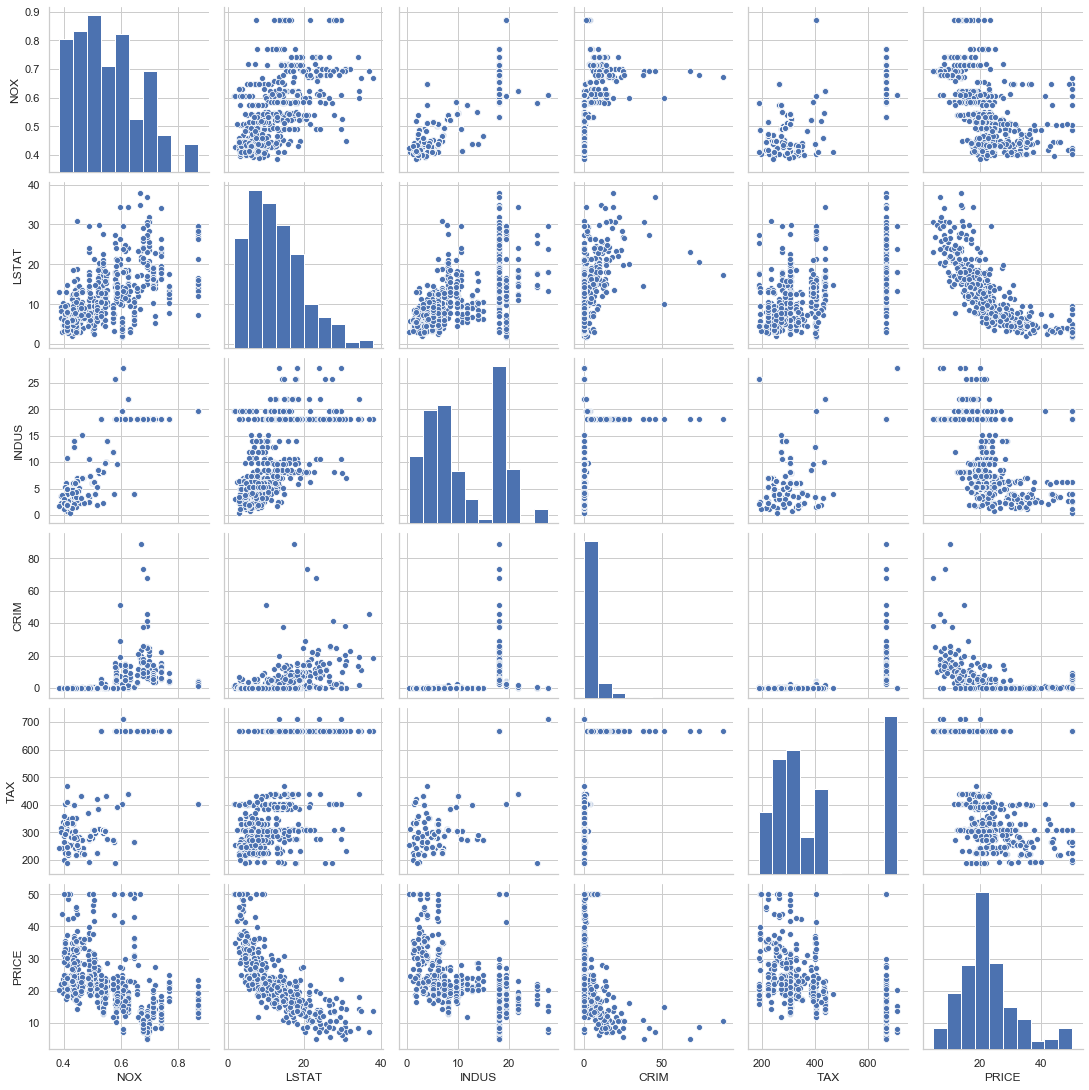

In [19]:
sns.pairplot(bh[['NOX','LSTAT', 'INDUS','CRIM', 'TAX','PRICE']])

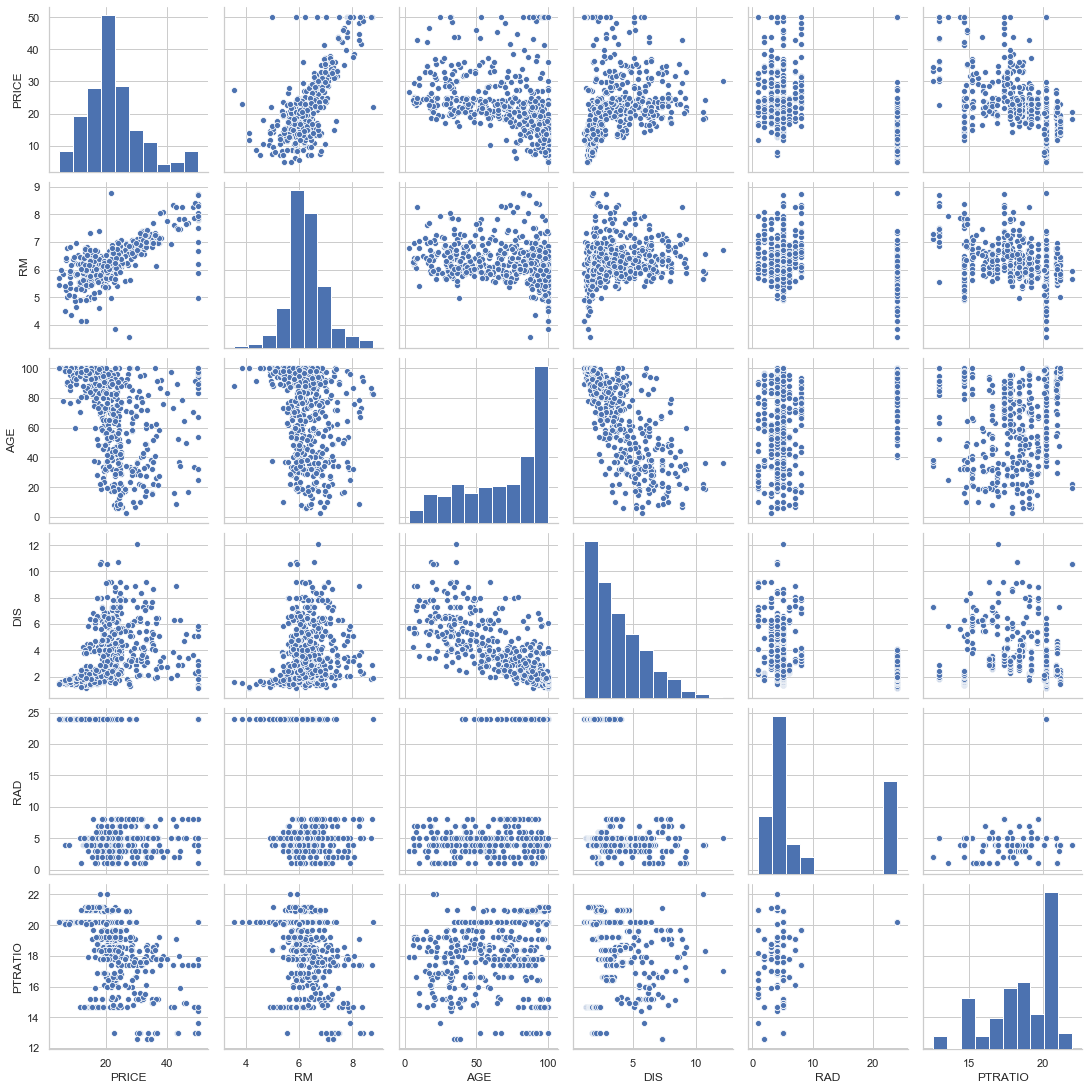

In [20]:
#Positives
sns.pairplot( bh[['PRICE', 'RM','AGE', 'DIS','RAD','PTRATIO']])

### Correlation Heatmap

Text(0.5, 1, 'Boston House dataset Correlation Heatmap\n')

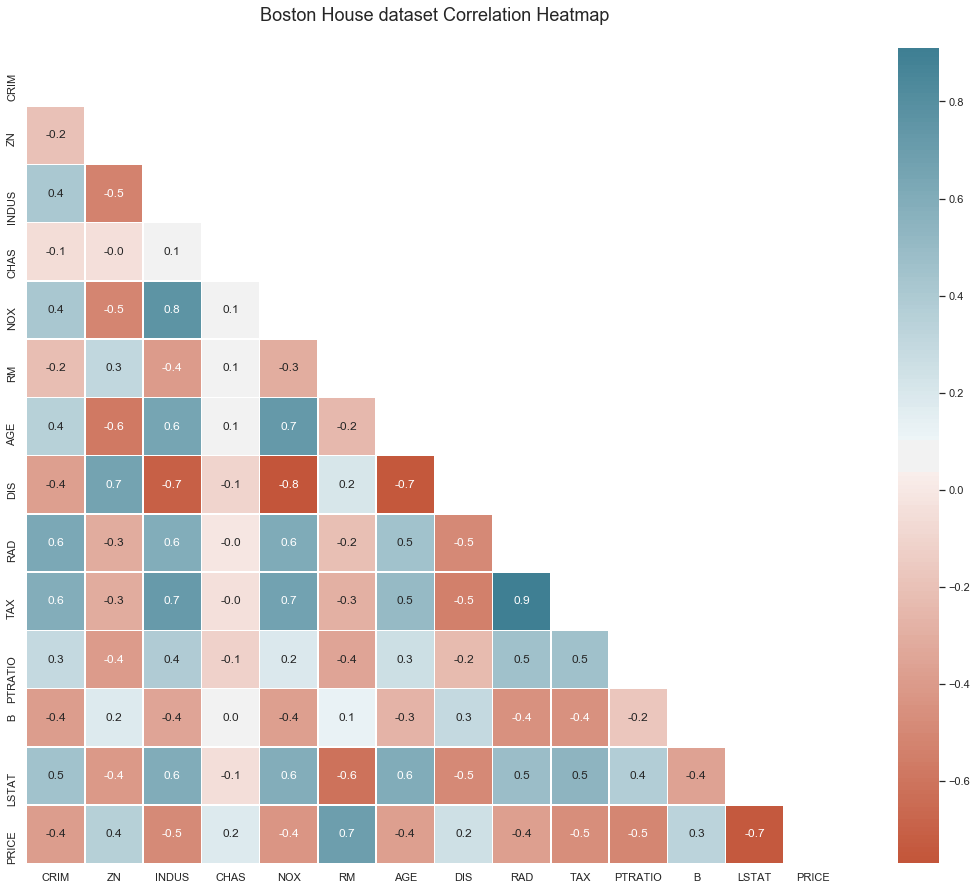

In [21]:
# Visualize
# check for correlation 
val = bh.corr() #finds linear pearson correlation
val = val[val<1]

mask = np.full_like(val,0) #alternatively, can use np.zeros_like(result)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(val, cbar=True, square=True, annot=True, fmt= '.1f',
           xticklabels=True, yticklabels=True,
           cmap=sns.diverging_palette(20, 220, n=200), linewidths=.5, mask=mask, ax=ax)
plt.title("Boston House dataset Correlation Heatmap\n", size = 18)

In [22]:
X = bh.drop('PRICE', axis=1)
y = bh['PRICE']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


# Baseline Model

In [23]:
from keras import losses
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(1, kernel_initializer= 'normal'))
    # Compile model
    model.compile(loss= losses.mean_squared_error, optimizer= 'adam' )
    return model

In [24]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results_T = cross_val_score(estimator, X_train, y_train, cv=kfold)
results_V = cross_val_score(estimator, X_test, y_test, cv=kfold)
print("Baseline (Train set): %.2f (%.2f) MSE" % (results_T.mean(), results_T.std()))
print("Baseline (Test set): %.2f (%.2f) MSE" % (results_V.mean(), results_V.std()))

Baseline (Train set): -124.01 (37.26) MSE
Baseline (Test set): -258.78 (148.12) MSE


In [25]:
estimator.fit(X_train, y_train) #training the algorithm
y_pred = estimator.predict(X_test)
df_B = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.flatten()})
df_B.head()

,Actual,Predicted
0,28.2,19.288786
1,23.9,22.922745
2,16.6,18.593666
3,22.0,20.638401
4,20.8,27.311592


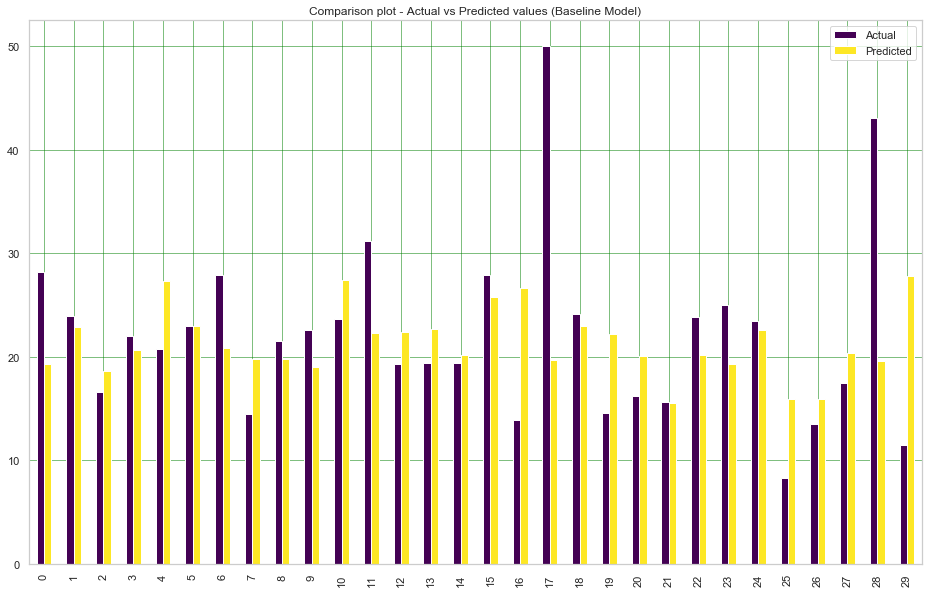

In [26]:
df_30 = df_B.head(30)
df_30.plot(kind='bar',figsize=(16,10), cmap='viridis')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison plot - Actual vs Predicted values (Baseline Model)')
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted values (Baseline Model)')

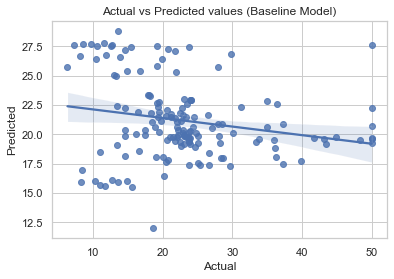

In [27]:
sns.regplot(x="Actual", y="Predicted", data=df_B)
plt.title('Actual vs Predicted values (Baseline Model)')

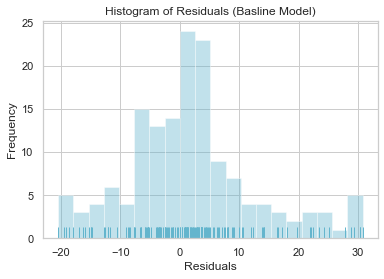

In [28]:
residuals_B = df_B['Actual'] - df_B['Predicted']
ax =sns.distplot(residuals_B, bins=20, kde=False, rug=True, color = 'c');
ax.set(xlabel='Residuals', ylabel='Frequency')
plt.title("Histogram of Residuals (Basline Model)")
plt.show()

# Standardized Model

In [29]:

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results_T = cross_val_score(pipeline, X_train, y_train, cv=kfold)
results_V = cross_val_score(pipeline, X_test, y_test, cv=kfold)
print("Standardized Model (Train set): %.2f (%.2f) MSE" % (results_T.mean(), results_T.std()))
print("Standardized Model (Test set): %.2f (%.2f) MSE" % (results_V.mean(), results_V.std()))

Standardized Model (Train set): -24.92 (7.77) MSE
Standardized Model (Test set): -36.19 (26.42) MSE


In [30]:
pipeline.fit(X_train, y_train) #training the algorithm
y_pred_ST = pipeline.predict(X_test)
df_ST = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_ST.flatten()})
df_ST.head()

,Actual,Predicted
0,28.2,27.956043
1,23.9,22.838434
2,16.6,18.327337
3,22.0,20.300591
4,20.8,24.500925


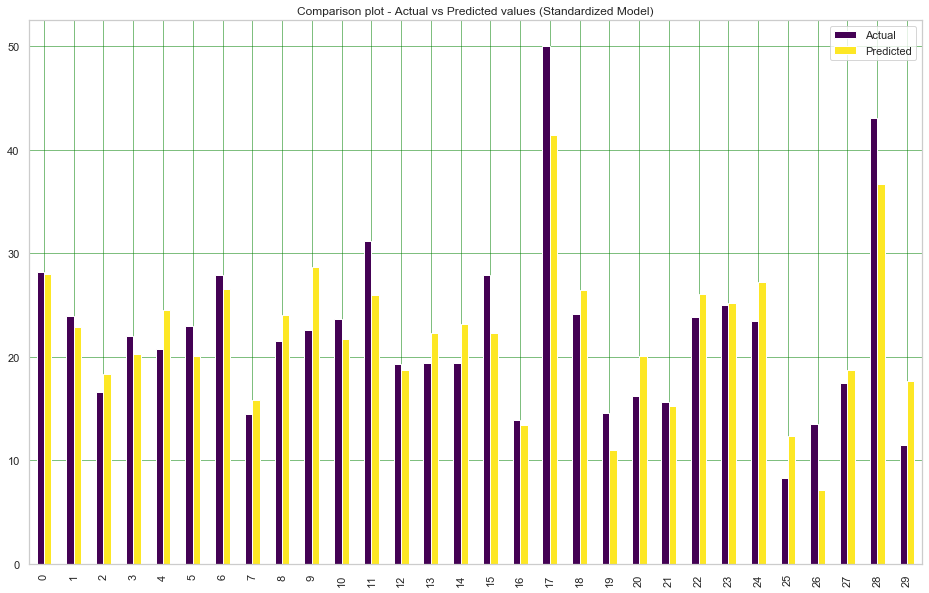

In [31]:
df_30_ST = df_ST.head(30)
df_30_ST.plot(kind='bar',figsize=(16,10), cmap='viridis')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison plot - Actual vs Predicted values (Standardized Model)')
plt.show()

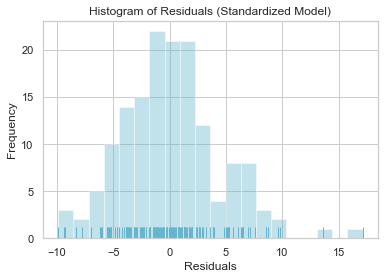

In [32]:
residuals_ST = df_ST['Actual'] - df_ST['Predicted']
ax =sns.distplot(residuals_ST, bins=20, kde=False, rug=True, color = 'c');
ax.set(xlabel='Residuals', ylabel='Frequency')
plt.title("Histogram of Residuals (Standardized Model)")
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted values (Standardized Model)')

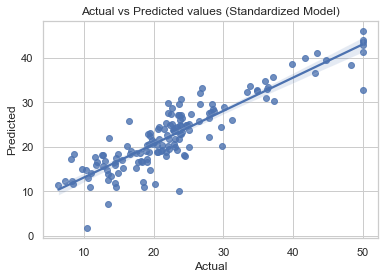

In [33]:
sns.regplot(x="Actual", y="Predicted", data=df_ST)
plt.title('Actual vs Predicted values (Standardized Model)')

# Tune The Neural Network Topology

### Larger Model - Adding More Layers

In [34]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results_T = cross_val_score(pipeline, X_train, y_train, cv=kfold)
results_V = cross_val_score(pipeline, X_test, y_test, cv=kfold)
print("Larger Model (Train set): %.2f (%.2f) MSE" % (results_T.mean(), results_T.std()))
print("Larger Model (Test set): %.2f (%.2f) MSE" % (results_V.mean(), results_V.std()))

Larger Model (Train set): -20.62 (6.94) MSE
Larger Model (Test set): -30.60 (28.61) MSE


In [35]:
pipeline.fit(X_train, y_train) #training the algorithm
y_pred_L = pipeline.predict(X_test)
df_L = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_L.flatten()})
df_L.head()

,Actual,Predicted
0,28.2,27.461206
1,23.9,23.096428
2,16.6,19.471529
3,22.0,18.931465
4,20.8,24.286049


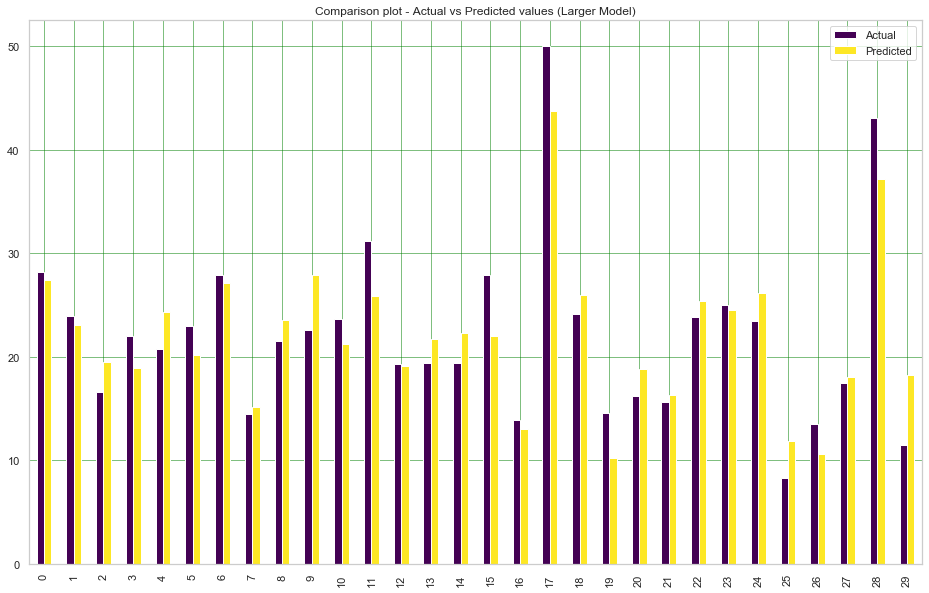

In [36]:
df_30_L = df_L.head(30)
df_30_L.plot(kind='bar',figsize=(16,10), cmap='viridis')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison plot - Actual vs Predicted values (Larger Model)')
plt.show()

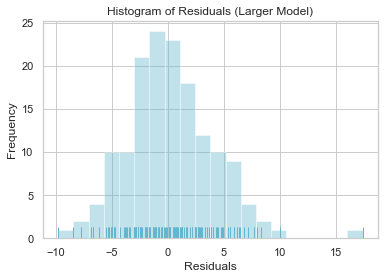

In [37]:
residuals_L = df_L['Actual'] - df_L['Predicted']
ax =sns.distplot(residuals_L, bins=20, kde=False, rug=True, color = 'c');
ax.set(xlabel='Residuals', ylabel='Frequency')
plt.title("Histogram of Residuals (Larger Model)")
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted values (Larger Model)')

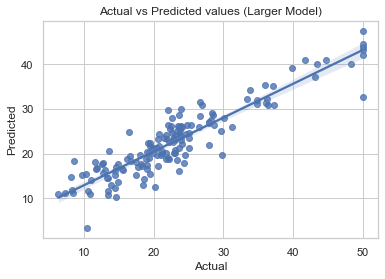

In [38]:
sns.regplot(x="Actual", y="Predicted", data=df_L)
plt.title('Actual vs Predicted values (Larger Model)')

### A Wider Model - Increasing the representation capacity

In [39]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results_T = cross_val_score(pipeline, X_train, y_train, cv=kfold)
results_V = cross_val_score(pipeline, X_test, y_test, cv=kfold)
print("Wider Model (Train set): %.2f (%.2f) MSE" % (results_T.mean(), results_T.std()))
print("Wider Model (Test set): %.2f (%.2f) MSE" % (results_V.mean(), results_V.std()))

Wider Model (Train set): -16.35 (5.85) MSE
Wider Model (Test set): -24.12 (15.94) MSE


In [40]:
pipeline.fit(X_train, y_train) #training the algorithm
y_pred_W = pipeline.predict(X_test)
df_W = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_W.flatten()})
df_W.head()

,Actual,Predicted
0,28.2,29.333477
1,23.9,24.007242
2,16.6,21.449366
3,22.0,18.723404
4,20.8,24.867283


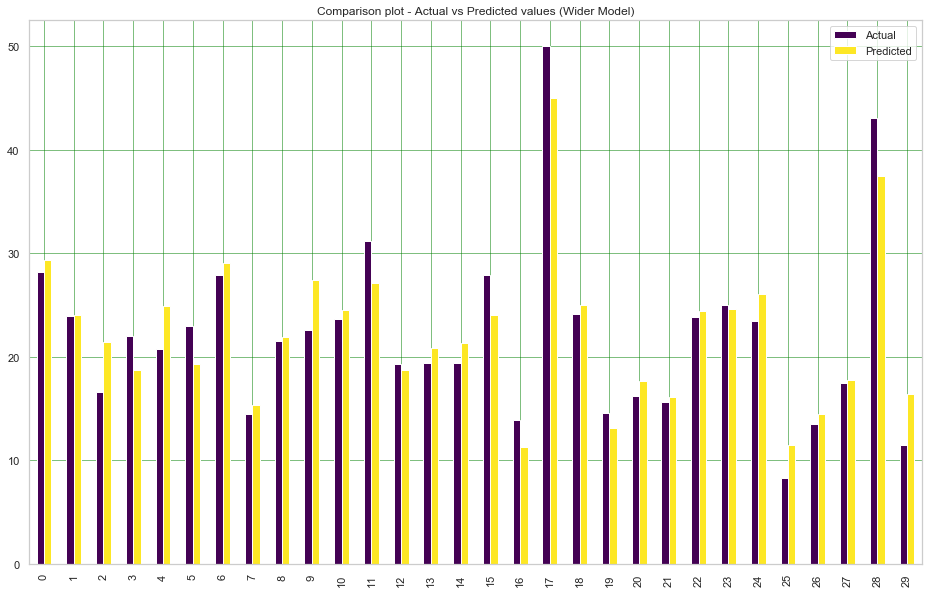

In [41]:
df_30_W = df_W.head(30)
df_30_W.plot(kind='bar',figsize=(16,10), cmap = "viridis")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison plot - Actual vs Predicted values (Wider Model)')
plt.show()

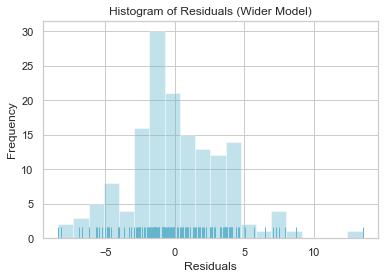

In [42]:
residuals_W = df_W['Actual'] - df_W['Predicted']
ax =sns.distplot(residuals_W, bins=20, kde=False, rug=True, color = 'c');
ax.set(xlabel='Residuals', ylabel='Frequency')
plt.title("Histogram of Residuals (Wider Model)")
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted values (Wider Model)')

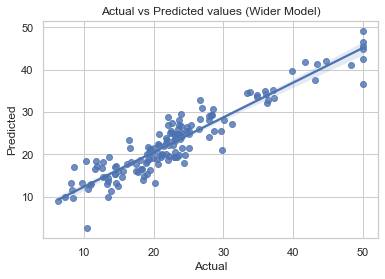

In [43]:
sns.regplot(x="Actual", y="Predicted", data=df_W)
plt.title('Actual vs Predicted values (Wider Model)')